# **Unraveling the Dynamics of Airfare Price Predictions**

Dennis Myasnyankin, Vannessa Salazar, and Christine Vu

Shiley-Marcos School of Engineering, University of San Diego

ADS 599: Capstone Project

Professor Ebrahim Tarshizi

December 11, 2023

***

## **Data Importing**

### **Import Libraries**

In [1]:
import pandas as pd
import zipfile
import io
import os
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas import json_normalize
from datetime import datetime
from io import BytesIO
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

***

## **Modeling**

### **Data Preparation**

#### **Train-Test Split**

In [33]:
target_column = 'Price'

# Features (X): Include all columns except "Price"
X = df2.drop(columns = [target_column])
# Target variable (y): "Price" column
y = df2[target_column]

# Split data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6236, 315)
X_test shape: (1560, 315)
y_train shape: (6236,)
y_test shape: (1560,)


### **Model Training**

#### **Random Forest**

In [34]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

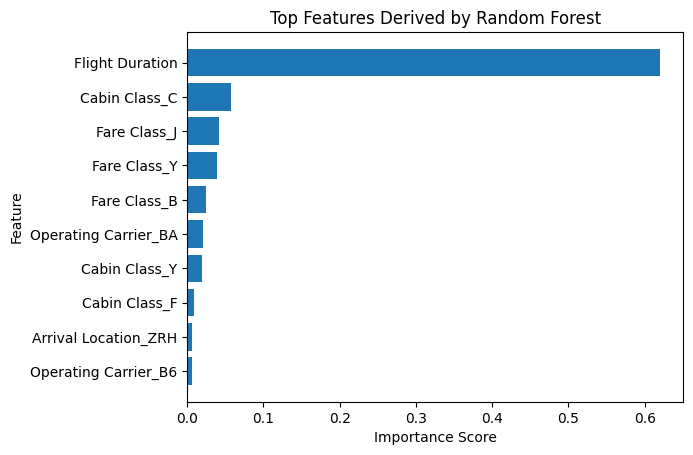

In [35]:
# Feature importance
feature_importances = rf_model.feature_importances_

top_n = 10
top_features = X.columns[np.argsort(feature_importances)[-top_n:]]

plt.barh(top_features, feature_importances[np.argsort(feature_importances)[-top_n:]])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title("Top Features Derived by Random Forest")
plt.show()

In [36]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'n_estimators': 50}

In [37]:
best_rf_model = RandomForestRegressor(
    n_estimators = best_params['n_estimators'],
    max_depth = best_params['max_depth'],
    random_state = 42
)

In [38]:
X_train_top_ten = X_train[['Fare Class_L', 'Departure City_ZRH', 'Fare Class_M',
                       'Operating Carrier_OS', 'Cabin Class_Y', 'Cabin Class_C',
                       'Operating Carrier_BA', 'Fare Class_Y', 'Fare Class_B',
                       'Flight Duration']]

best_rf_model.fit(X_train_top_ten, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [39]:
X_test_top_ten = X_test[['Fare Class_L', 'Departure City_ZRH', 'Fare Class_M',
                       'Operating Carrier_OS', 'Cabin Class_Y', 'Cabin Class_C',
                       'Operating Carrier_BA', 'Fare Class_Y', 'Fare Class_B',
                       'Flight Duration']]

y_pred = best_rf_model.predict(X_test_top_ten)

In [40]:
X_train_top_ten = X_train[['Fare Class_L', 'Departure City_ZRH', 'Fare Class_M',
                            'Operating Carrier_OS', 'Cabin Class_Y', 'Cabin Class_C',
                            'Operating Carrier_BA', 'Fare Class_Y', 'Fare Class_B',
                            'Flight Duration']]

X_test_top_ten = X_test[['Fare Class_L', 'Departure City_ZRH', 'Fare Class_M',
                          'Operating Carrier_OS', 'Cabin Class_Y', 'Cabin Class_C',
                          'Operating Carrier_BA', 'Fare Class_Y', 'Fare Class_B',
                          'Flight Duration']]

#### **K-Nearest Neighbors (k-NN)**

In [41]:
knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train_top_ten, y_train)

KNeighborsRegressor()

#### **Decision Tree**

In [42]:
dt_model = DecisionTreeRegressor(max_depth = 3)
dt_model.fit(X_train_top_ten, y_train)

DecisionTreeRegressor(max_depth=3)

#### **Linear Regression**

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train_top_ten, y_train)

LinearRegression()

#### **Lasso Regression**

In [44]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train_top_ten, y_train)

Lasso(alpha=0.1)

#### **Ridge Regression**

In [45]:
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train_top_ten, y_train)

Ridge(alpha=0.1)

#### **Elastic Net**

In [46]:
en_model = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
en_model.fit(X_train_top_ten, y_train)

ElasticNet(alpha=0.1)

#### **Extreme Gradient Boosting (XGBoost)**

In [47]:
xgb_model = XGBRegressor(objective = 'reg:squarederror')
xgb_model.fit(X_train_top_ten, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### **Neural Networks**

In [48]:
nn_model = MLPRegressor(hidden_layer_sizes = (100, ), max_iter = 500)
nn_model.fit(X_train_top_ten, y_train)

C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500)

#### **Support Vector Regression (SVR)**

In [49]:
svr_model = SVR(kernel = 'linear')
svr_model.fit(X_train_top_ten, y_train)

SVR(kernel='linear')

#### **Gradient Boosting**

In [50]:
gb_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb_model.fit(X_train_top_ten, y_train)

GradientBoostingRegressor(random_state=42)

#### **Training Set Performance**

In [51]:
# Define a list of models
models = [
    ("Random Forest", RandomForestRegressor(n_estimators = 100, random_state = 42)),
    ("k-Nearest Neighbors (k-NN)", KNeighborsRegressor(n_neighbors = 5)),
    ("Decision Tree", DecisionTreeRegressor(max_depth = 3)),
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso(alpha = 0.1)),
    ("Ridge Regression", Ridge(alpha = 0.1)),
    ("Elastic Net", ElasticNet(alpha = 0.1, l1_ratio = 0.5)),
    ("XGBoost", XGBRegressor(objective = 'reg:squarederror')),
    ("Neural Networks", MLPRegressor(hidden_layer_sizes = (100, ), max_iter = 500)),
    ("Support Vector Regression (SVR)", SVR(kernel = 'linear')),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42))
]

In [52]:
# Create an empty list to store dictionaries of metrics
metrics_list = []

# Loop over models
for model_name, model in models:
    # Train the model and make predictions on the training set
    model.fit(X_train_top_ten, y_train)
    y_pred_train = model.predict(X_train_top_ten)

    # Calculate performance metrics on the training set
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared = False)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Append metrics to the list
    metrics_list.append({
        'Model': model_name,
        'MSE (Train)': mse_train,
        'RMSE (Train)': rmse_train,
        'MAE (Train)': mae_train,
        'R2 (Train)': r2_train
    })

# Create a dataframe from the list of metrics
metrics_df_train = pd.DataFrame(metrics_list)
metrics_df_train

C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MSE (Train),RMSE (Train),MAE (Train),R2 (Train)
0,Random Forest,16328.659384,127.783643,80.720415,0.928897
1,k-Nearest Neighbors (k-NN),40431.969206,201.077023,98.028791,0.823939
2,Decision Tree,60845.897216,246.669611,147.037770,0.735046
3,Linear Regression,100158.425712,316.478160,194.646886,0.563859
4,Lasso Regression,100160.839439,316.481973,194.408027,0.563849
5,Ridge Regression,100158.436953,316.478178,194.635902,0.563859
6,Elastic Net,110784.867589,332.843608,189.625273,0.517587
7,XGBoost,15870.246126,125.977165,80.751092,0.930893
8,Neural Networks,60652.110933,246.276493,134.906075,0.735890
9,Support Vector Regression (SVR),151830.303145,389.654081,162.347820,0.338854


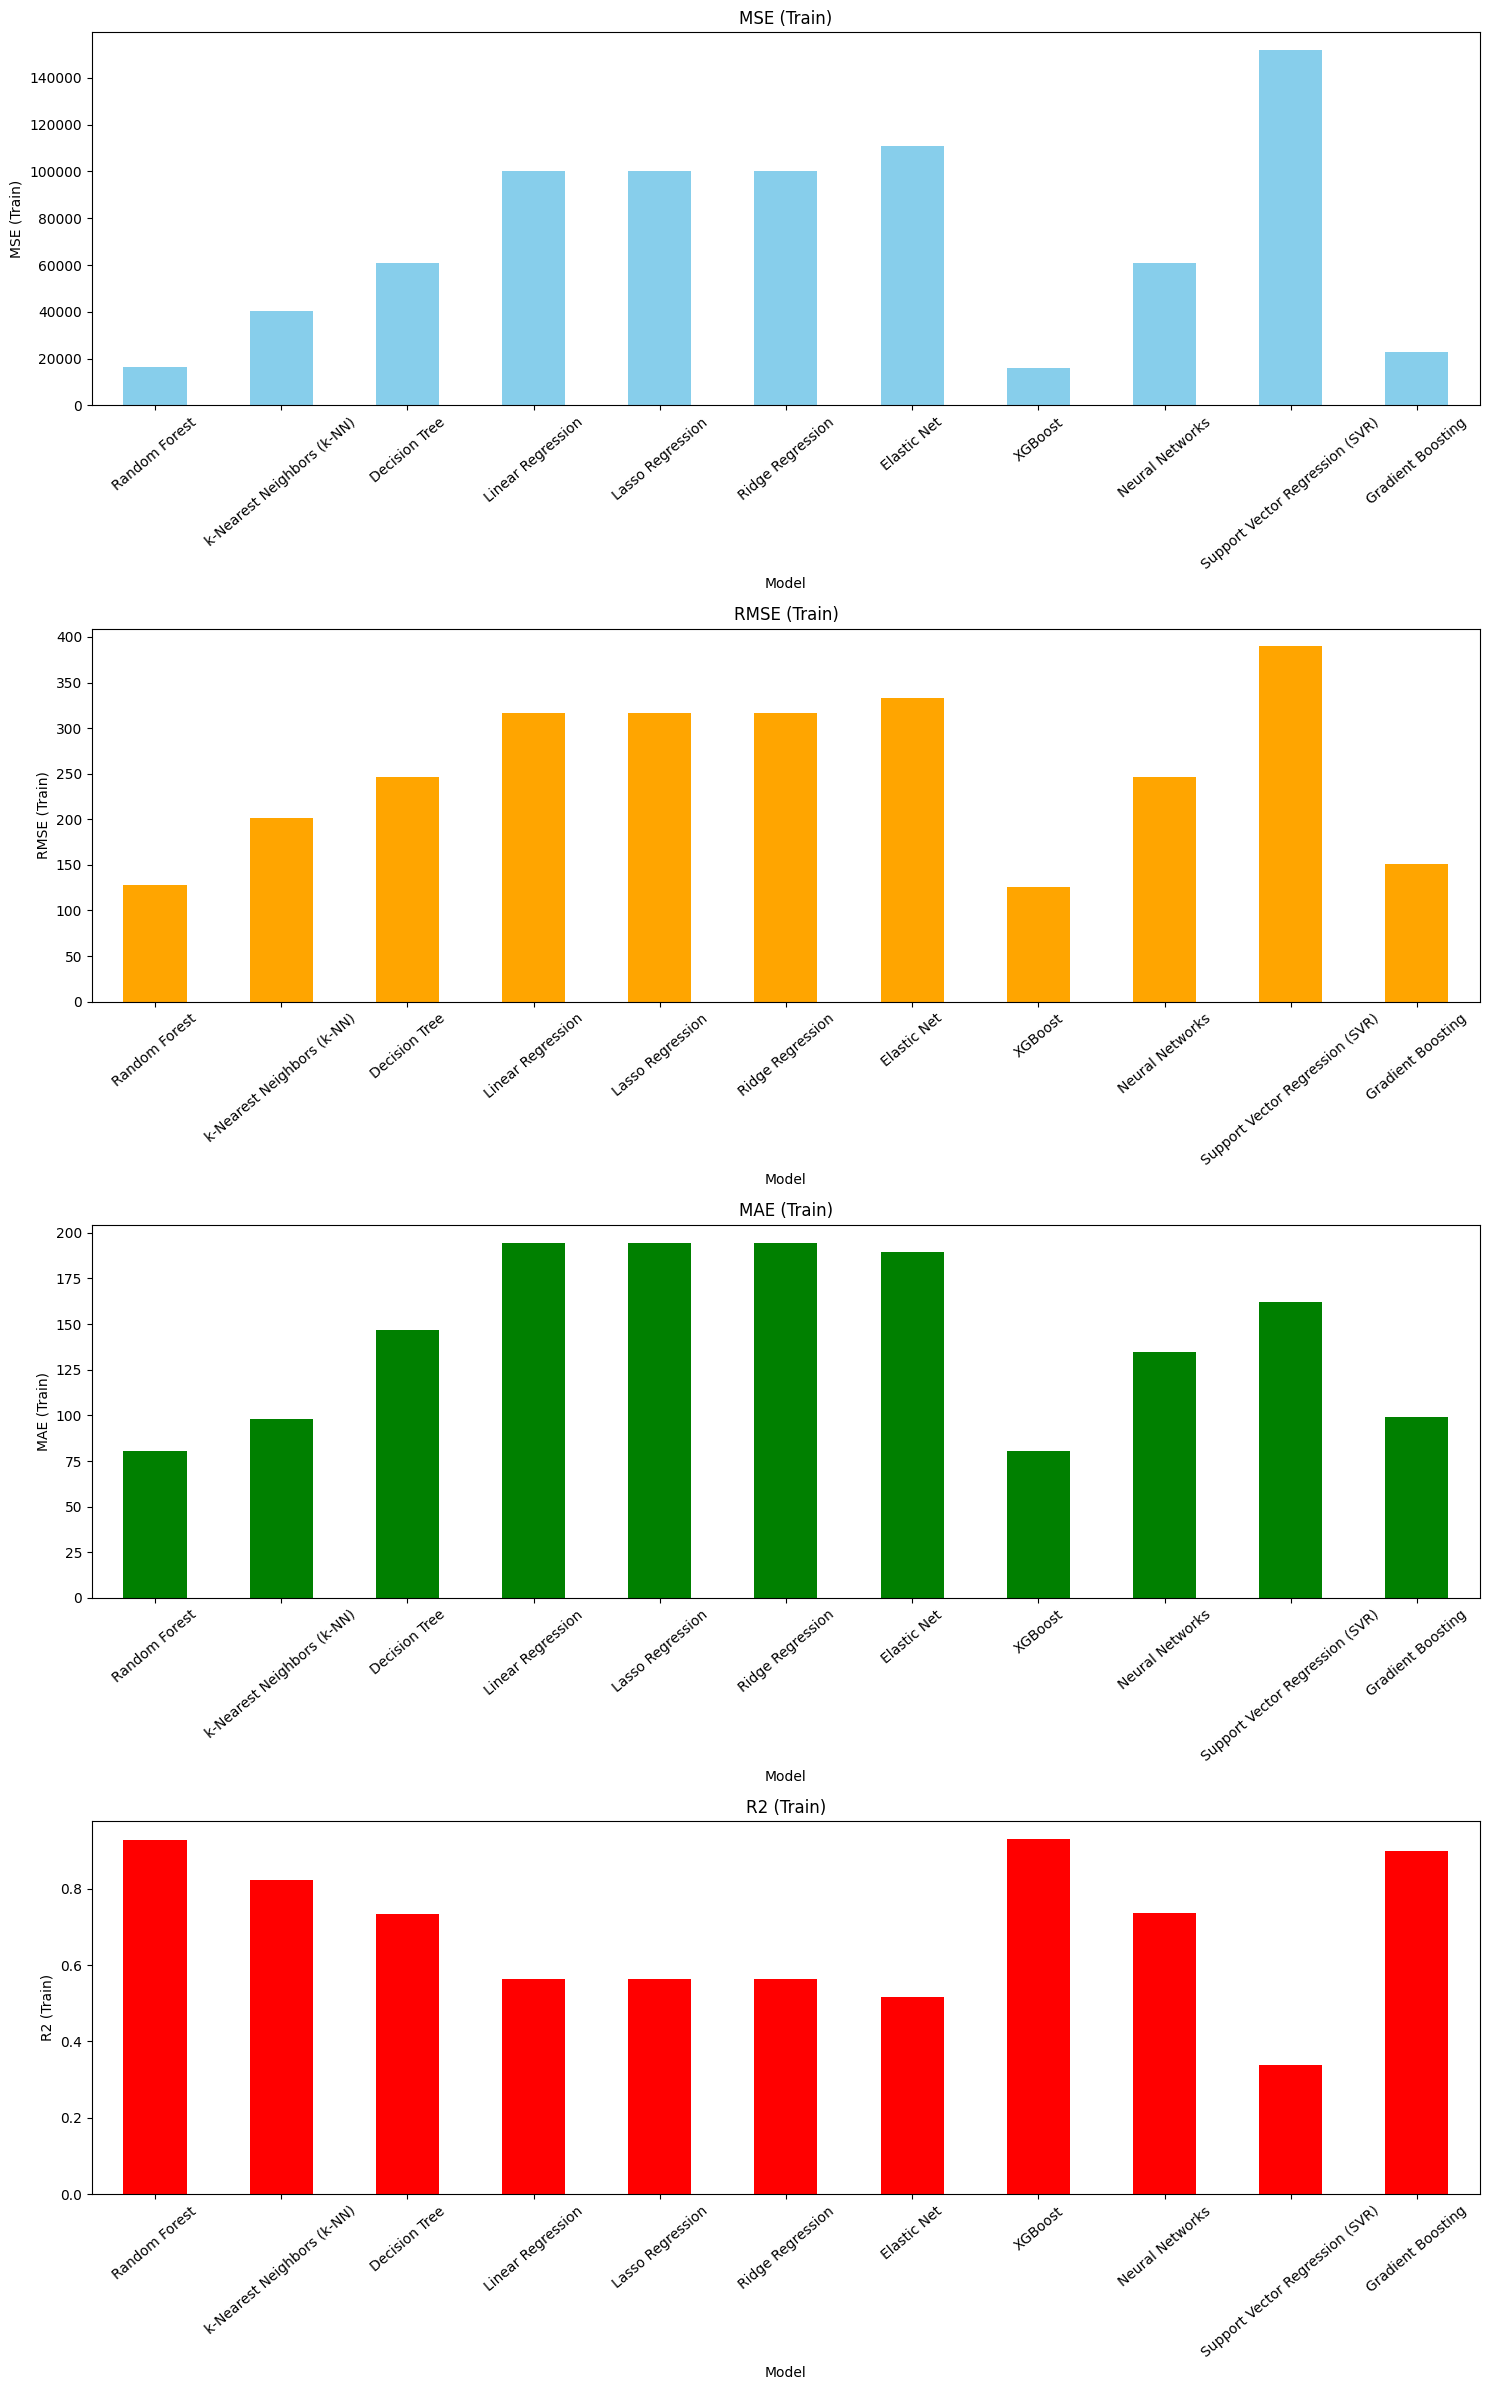

In [53]:
# Set the model names as the index
metrics_df_train.set_index('Model', inplace = True)

# Define the metrics to plot
metrics_to_plot_train = ['MSE (Train)', 'RMSE (Train)', 'MAE (Train)', 'R2 (Train)']
colors = ['skyblue', 'orange', 'green', 'red']

# Create subplots for each metric
fig, axes = plt.subplots(nrows = len(metrics_to_plot_train), ncols = 1, figsize = (15, 6 * len(metrics_to_plot_train)))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics_to_plot_train):
    metrics_df_train[metric].plot(kind = 'bar', ax=axes[i], color = colors[i])
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation = 40)

plt.tight_layout()
plt.show()

#### **Feature Scaling on Training Set**

In [54]:
# Initialize a StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models on the scaled data
for model_name, model in models:
    model.fit(X_train_scaled, y_train)

C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.362e+05, tolerance: 1.432e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
# Create an empty list to store dictionaries of metrics for the scaled training set
metrics_list_scaled = []

# Loop over models
for model_name, model in models:
    # Make predictions on the scaled training set
    y_pred_train_scaled = model.predict(X_train_scaled)

    # Calculate performance metrics on the scaled training set
    mse_train_scaled = mean_squared_error(y_train, y_pred_train_scaled)
    rmse_train_scaled = mean_squared_error(y_train, y_pred_train_scaled, squared = False)
    mae_train_scaled = mean_absolute_error(y_train, y_pred_train_scaled)
    r2_train_scaled = r2_score(y_train, y_pred_train_scaled)

    # Append metrics to the list
    metrics_list_scaled.append({
        'Model': model_name,
        'MSE (Train Scaled)': mse_train_scaled,
        'RMSE (Train Scaled)': rmse_train_scaled,
        'MAE (Train Scaled)': mae_train_scaled,
        'R2 (Train Scaled)': r2_train_scaled
    })

# Create a dataframe from the list of metrics for the scaled training set
metrics_df_train_scaled = pd.DataFrame(metrics_list_scaled)
metrics_df_train_scaled

,Model,MSE (Train Scaled),RMSE (Train Scaled),MAE (Train Scaled),R2 (Train Scaled)
0,Random Forest,1674.253856,40.917647,12.555040,0.992709
1,k-Nearest Neighbors (k-NN),25183.873959,158.694278,56.345157,0.890337
2,Decision Tree,60845.897216,246.669611,147.037770,0.735046
3,Linear Regression,44328.918634,210.544339,108.092807,0.806969
4,Lasso Regression,43723.774908,209.102307,103.805063,0.809605
5,Ridge Regression,43559.590771,208.709345,103.786820,0.810319
6,Elastic Net,44750.121722,211.542246,103.612726,0.805135
7,XGBoost,1700.035310,41.231484,26.335234,0.992597
8,Neural Networks,1744.201331,41.763636,15.515553,0.992405
9,Support Vector Regression (SVR),57093.432457,238.942320,88.865988,0.751386


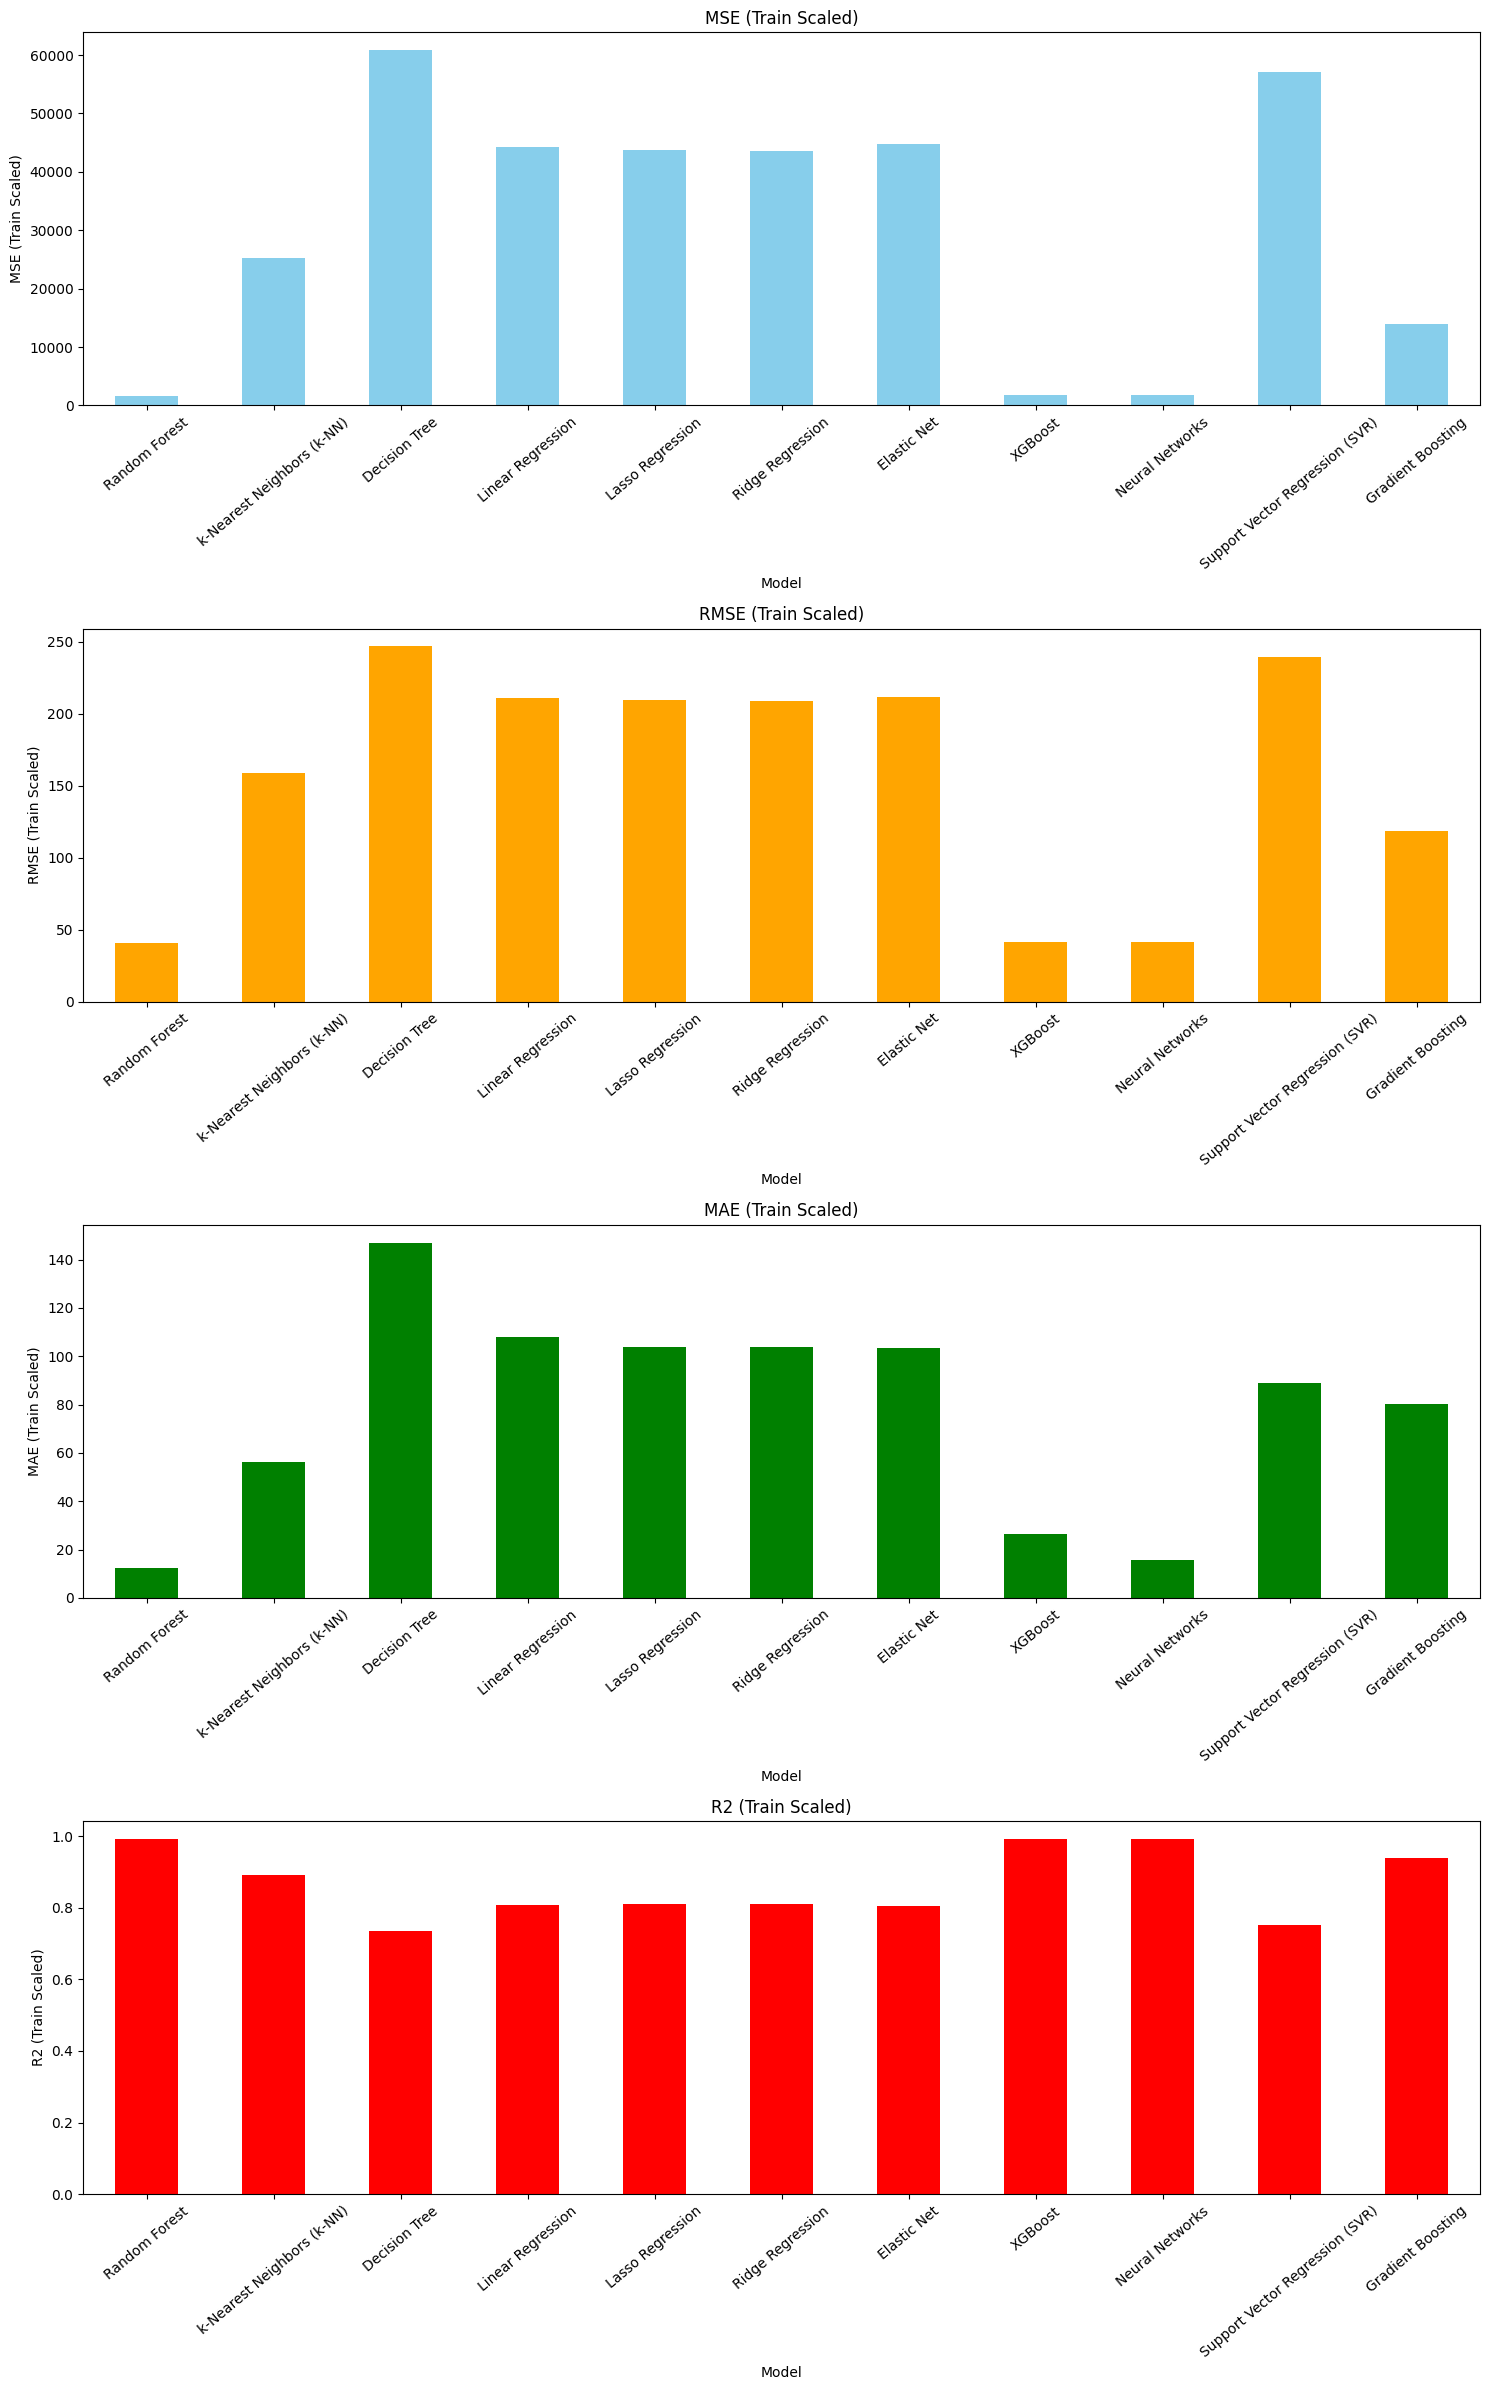

In [56]:
# Set the model names as the index
metrics_df_train_scaled.set_index('Model', inplace = True)

# Define the metrics to plot for the scaled training set
metrics_to_plot_train = ['MSE (Train Scaled)', 'RMSE (Train Scaled)', 'MAE (Train Scaled)', 'R2 (Train Scaled)']

# Create subplots for each metric
fig, axes = plt.subplots(nrows = len(metrics_to_plot_train), ncols = 1, figsize = (15, 6 * len(metrics_to_plot_train)))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics_to_plot_train):
    metrics_df_train_scaled[metric].plot(kind = 'bar', ax = axes[i], color = colors[i])
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis = 'x', rotation = 40)

plt.tight_layout()
plt.show()

### **5-Fold Cross Validation**

In [57]:
# Initialize an empty list to store results
results = []

# Perform cross-validation
for model_name, model in models:
    print(f"Model: {model_name}")

    # Perform 5-fold cross validation
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

    # Initialize lists to store metric scores for each fold
    mse_scores, rmse_scores, mae_scores, r2_scores = [], [], [], []

    # Loop over folds
    for train_index, test_index in kf.split(X_train_top_ten, y_train):
        X_train_fold, X_test_fold = X_train_top_ten.iloc[train_index], X_train_top_ten.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model and make predictions
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        # Calculate metrics for this fold
        mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
        rmse_fold = np.sqrt(mse_fold)
        mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
        r2_fold = r2_score(y_test_fold, y_pred_fold)

        # Append scores to lists
        mse_scores.append(mse_fold)
        rmse_scores.append(rmse_fold)
        mae_scores.append(mae_fold)
        r2_scores.append(r2_fold)

    # Calculate scores across folds
    mean_mse = np.mean(mse_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)

    # Append results to the list
    results.append({
        'Model': model_name,
        'Mean MSE': mean_mse,
        'Mean RMSE': mean_rmse,
        'Mean MAE': mean_mae,
        'Mean R2': mean_r2
    })

# Create a dataframe from the list of results
results_df = pd.DataFrame(results)
results_df

Model: Random Forest
Model: k-Nearest Neighbors (k-NN)
Model: Decision Tree
Model: Linear Regression
Model: Lasso Regression
Model: Ridge Regression
Model: Elastic Net
Model: XGBoost
Model: Neural Networks


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chris\A

Model: Support Vector Regression (SVR)
Model: Gradient Boosting


,Model,Mean MSE,Mean RMSE,Mean MAE,Mean R2
0,Random Forest,26591.339753,162.805543,93.615495,0.882526
1,k-Nearest Neighbors (k-NN),59033.902975,237.340661,111.241840,0.753091
2,Decision Tree,63978.240537,252.569455,150.031980,0.717292
3,Linear Regression,101260.715717,316.380305,195.114206,0.562599
4,Lasso Regression,101262.152166,316.371036,194.879016,0.562637
5,Ridge Regression,101258.751049,316.375888,195.100311,0.562612
6,Elastic Net,111259.024049,331.410597,189.826178,0.520135
7,XGBoost,26143.635465,161.133317,93.041816,0.884287
8,Neural Networks,68663.849206,260.023038,147.823035,0.703787
9,Support Vector Regression (SVR),153807.622662,390.261875,163.820621,0.334492


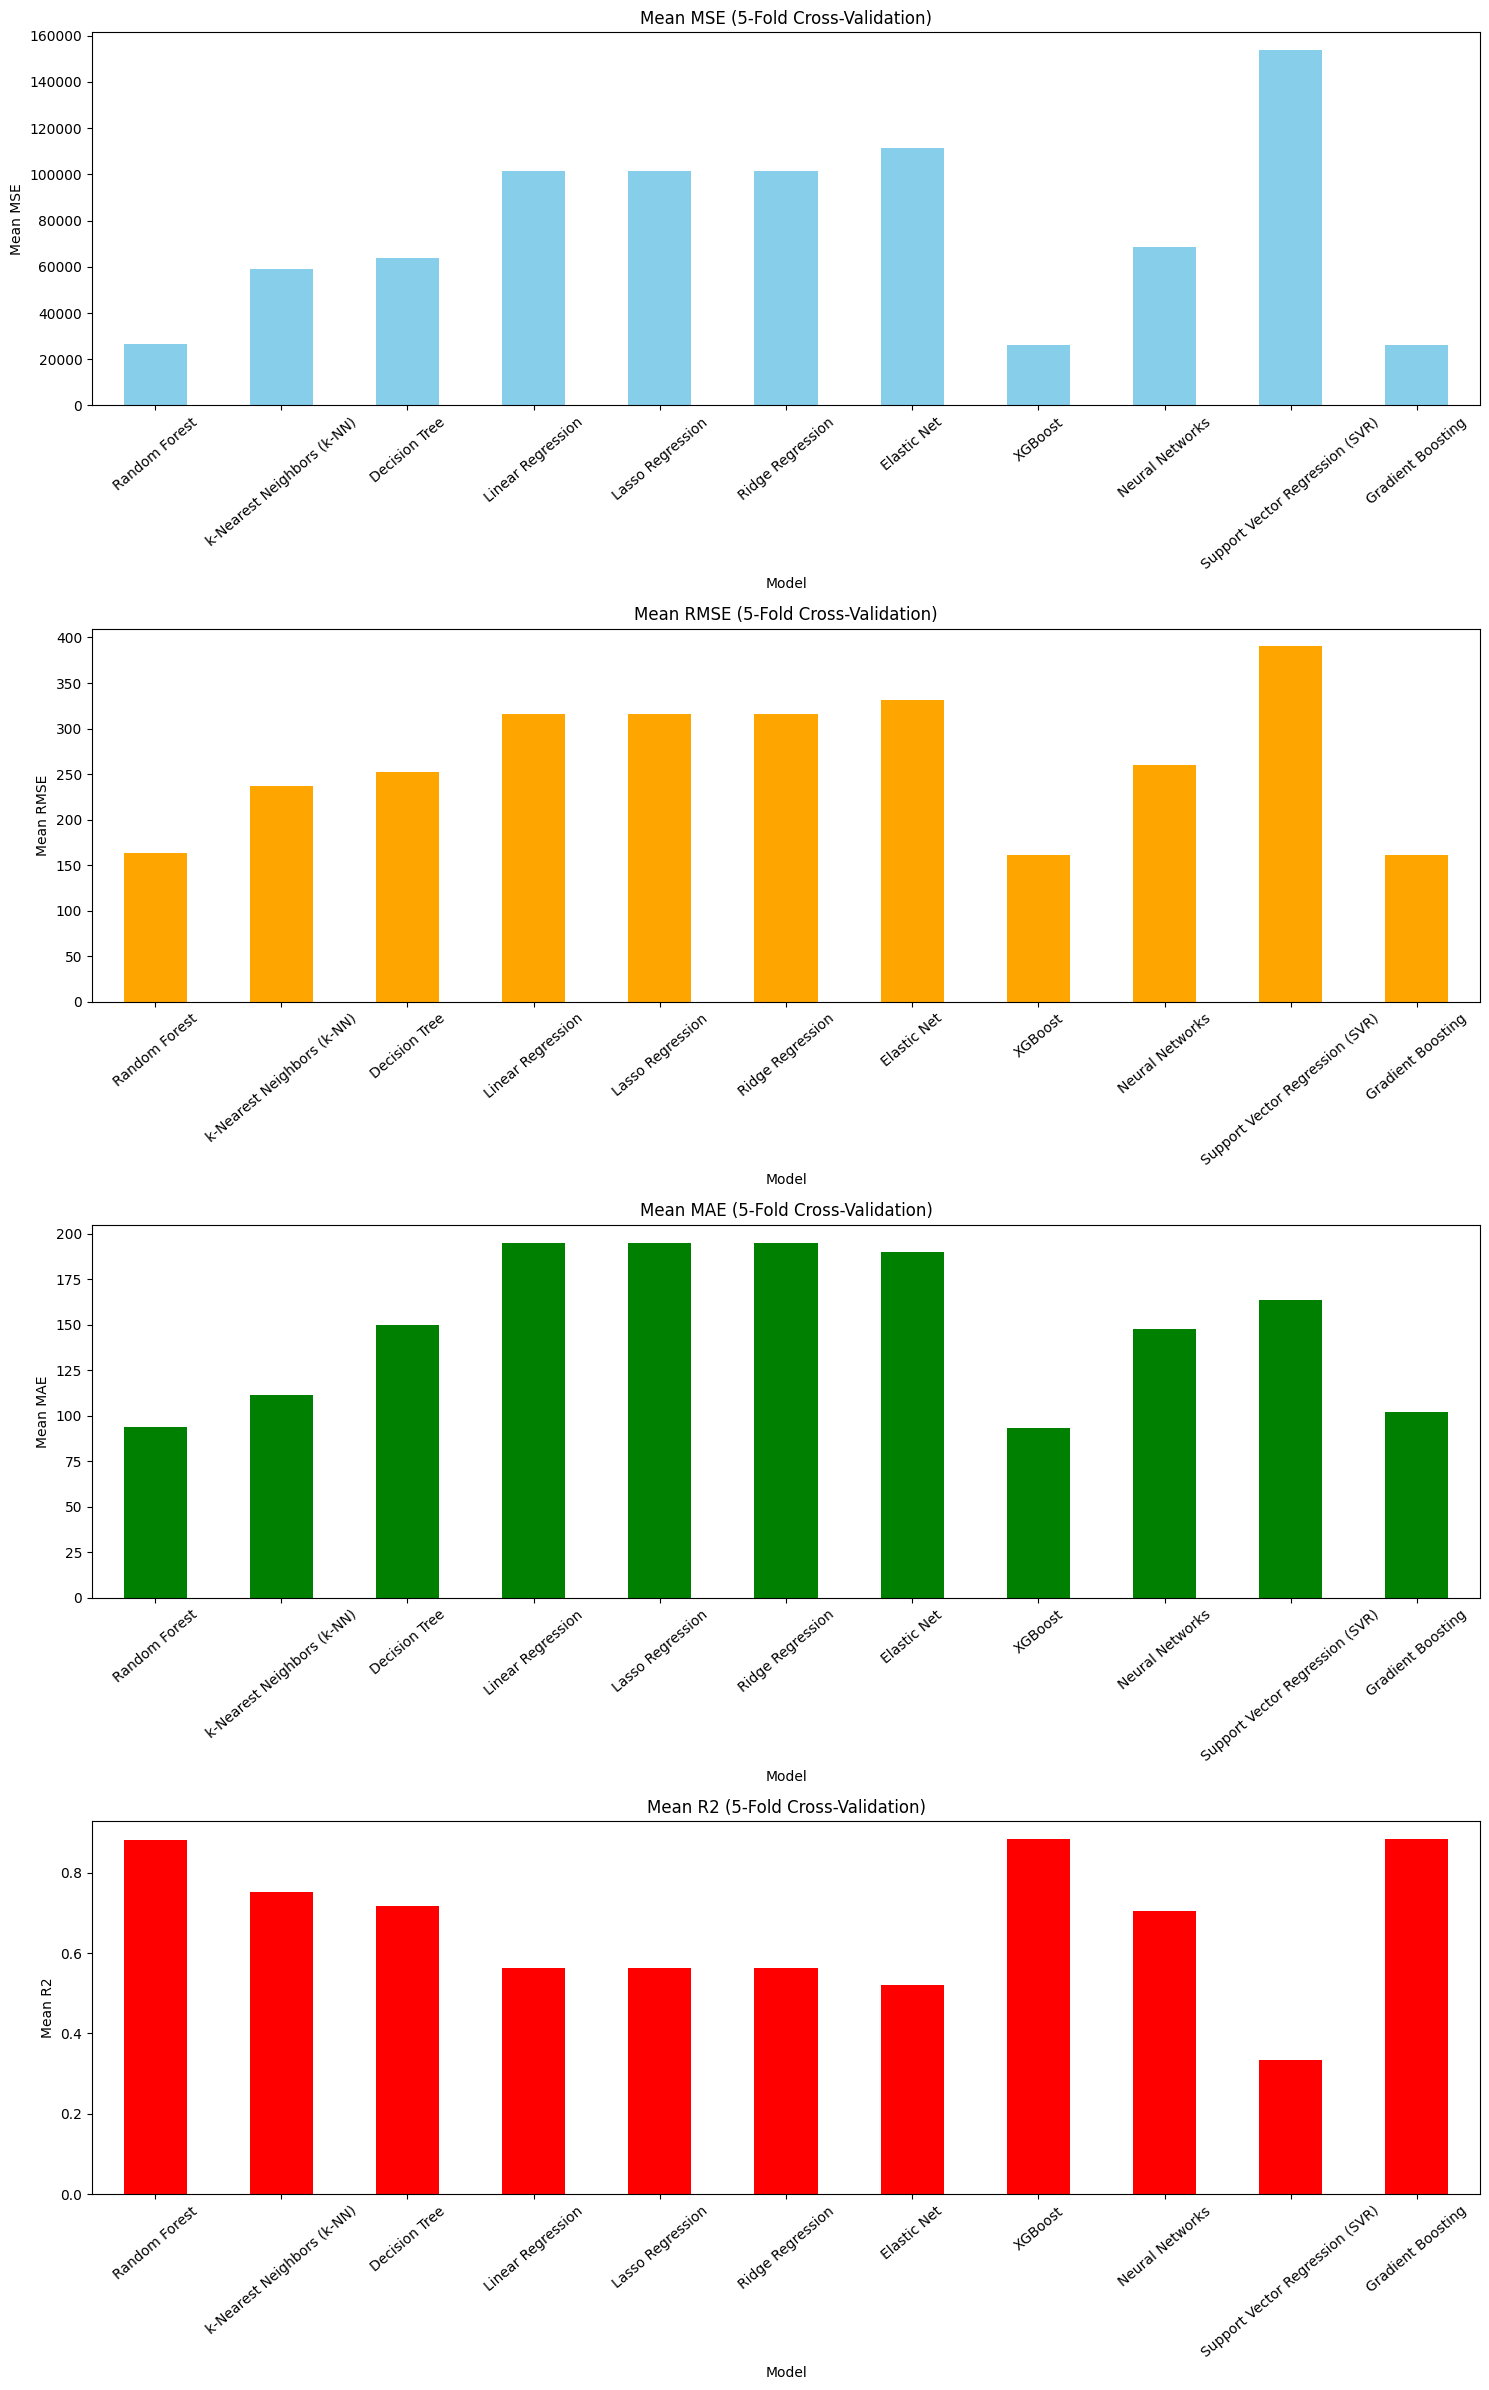

In [58]:
# Set the model names as the index
results_df.set_index('Model', inplace = True)

# Define the metrics to plot
metrics_to_plot_cv = ['Mean MSE', 'Mean RMSE', 'Mean MAE', 'Mean R2']

# Create subplots for each metric
fig, axes = plt.subplots(nrows = len(metrics_to_plot_cv), ncols = 1, figsize = (15, 6 * len(metrics_to_plot_cv)))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics_to_plot_cv):
    results_df[metric].plot(kind = 'bar', ax = axes[i], color = colors[i])
    axes[i].set_title(f'{metric} (5-Fold Cross-Validation)')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation = 40)
    
plt.tight_layout()
plt.show()

### **Model Testing**

#### **Random Forest**

In [59]:
y_pred_rf = rf_model.predict(X_test)

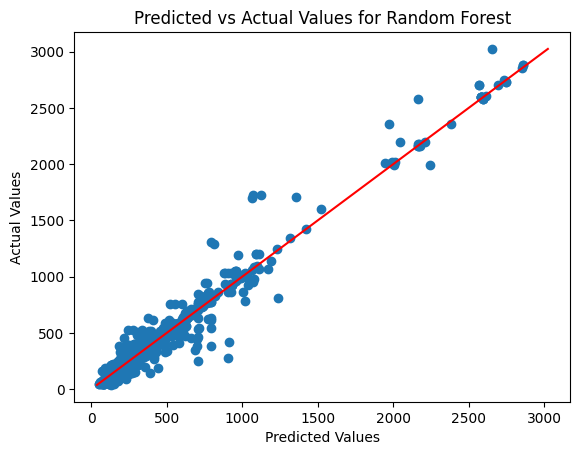

In [60]:
# Plotting actual vs predicted values
plt.scatter(y_pred_rf, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Random Forest")
plt.show()

#### **k-Nearest Neighbors (k-NN)**

In [61]:
y_pred_knn = knn_model.predict(X_test_top_ten)

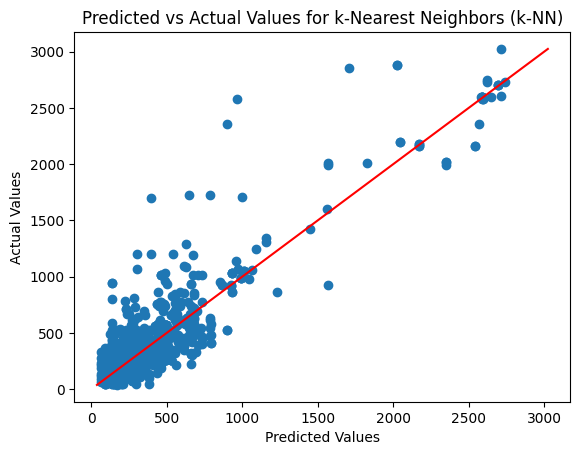

In [62]:
# Plotting actual vs predicted values
plt.scatter(y_pred_knn, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for k-Nearest Neighbors (k-NN)")
plt.show()

#### **Decision Tree**

In [63]:
y_pred_dt = dt_model.predict(X_test_top_ten)

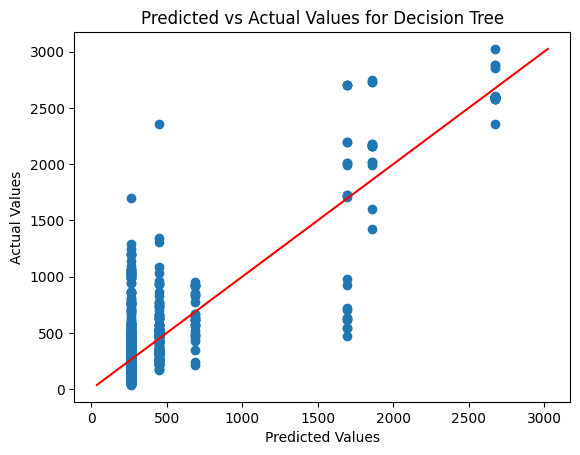

In [64]:
# Plotting actual vs predicted values
plt.scatter(y_pred_dt, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Decision Tree")
plt.show()

#### **Linear Regression**

In [65]:
y_pred_lr = lr_model.predict(X_test_top_ten)

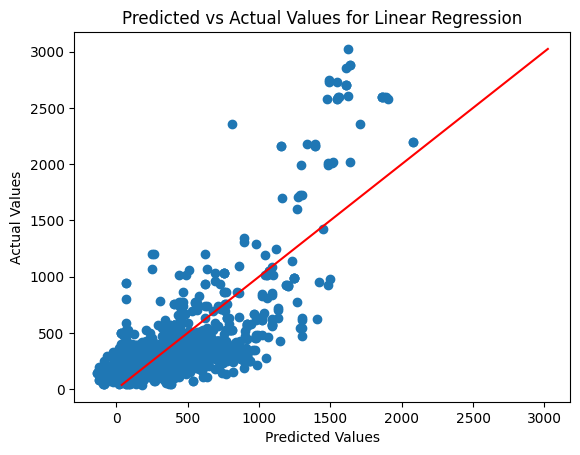

In [66]:
# Plotting actual vs predicted values
plt.scatter(y_pred_lr, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Linear Regression")
plt.show()

#### **Lasso Regression**

In [67]:
y_pred_lasso = lasso_model.predict(X_test_top_ten)

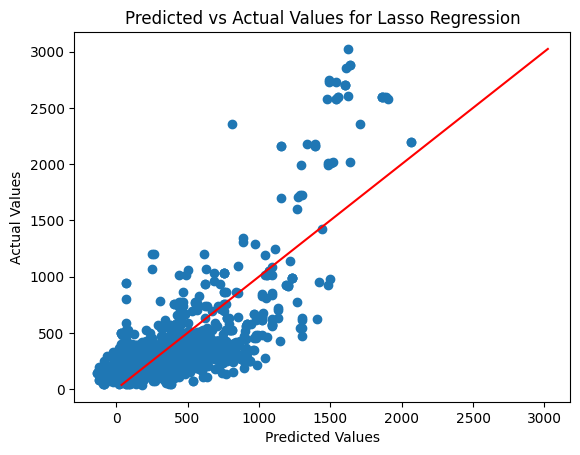

In [68]:
# Plotting actual vs predicted values
plt.scatter(y_pred_lasso, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Lasso Regression")
plt.show()

#### **Ridge Regression**

In [69]:
y_pred_ridge = ridge_model.predict(X_test_top_ten)

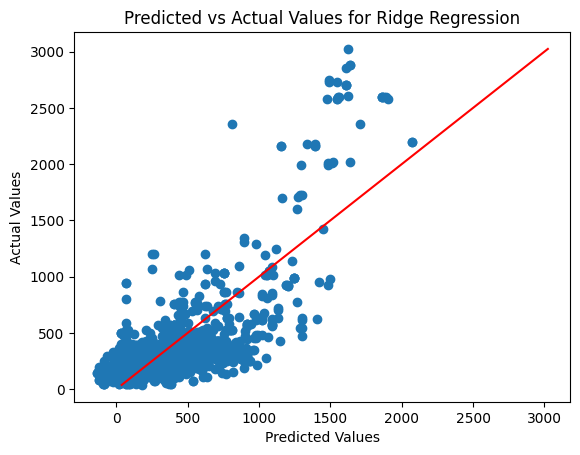

In [70]:
# Plotting actual vs predicted values
plt.scatter(y_pred_ridge, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Ridge Regression")
plt.show()

#### **Elastic Net**

In [71]:
y_pred_en = en_model.predict(X_test_top_ten)

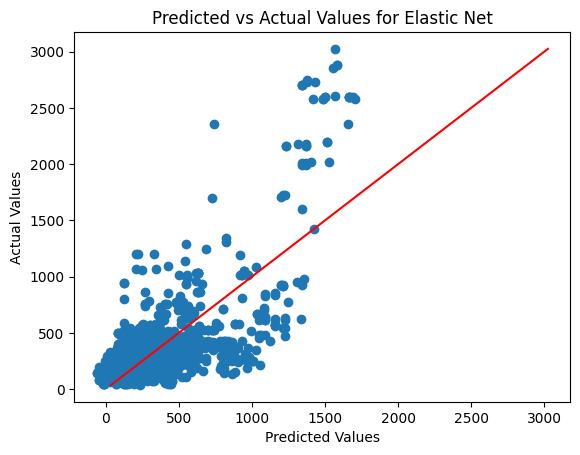

In [72]:
# Plotting actual vs predicted values
plt.scatter(y_pred_en, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Elastic Net")
plt.show()

#### **Extreme Gradient Boosting (XGBoost)**

In [73]:
y_pred_xgb = xgb_model.predict(X_test_top_ten)

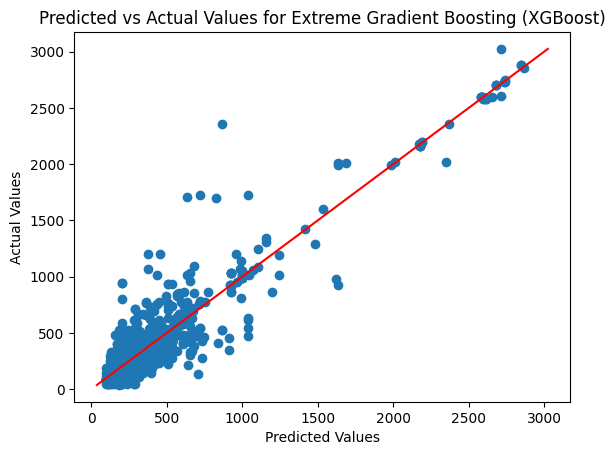

In [74]:
# Plotting actual vs predicted values
plt.scatter(y_pred_xgb, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Extreme Gradient Boosting (XGBoost)")
plt.show()

#### **Neural Networks**

In [75]:
y_pred_nn = nn_model.predict(X_test_top_ten)

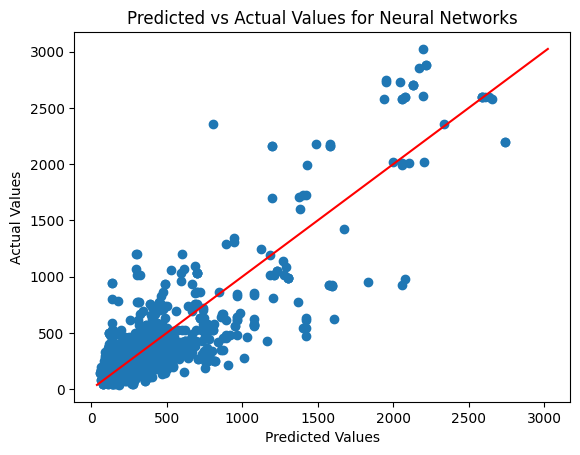

In [76]:
# Plotting actual vs predicted values
plt.scatter(y_pred_nn, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Neural Networks")
plt.show()

#### **Support Vector Regression (SVR)**

In [77]:
y_pred_svr = svr_model.predict(X_test_top_ten)

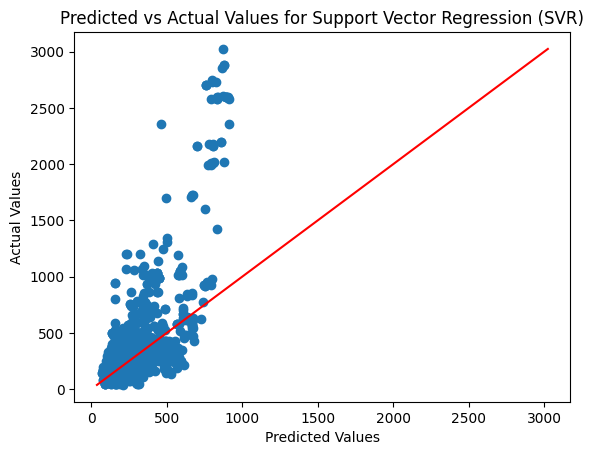

In [78]:
# Plotting actual vs predicted values
plt.scatter(y_pred_svr, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Support Vector Regression (SVR)")
plt.show()

#### **Gradient Boosting**

In [79]:
y_pred_gb = gb_model.predict(X_test_top_ten)

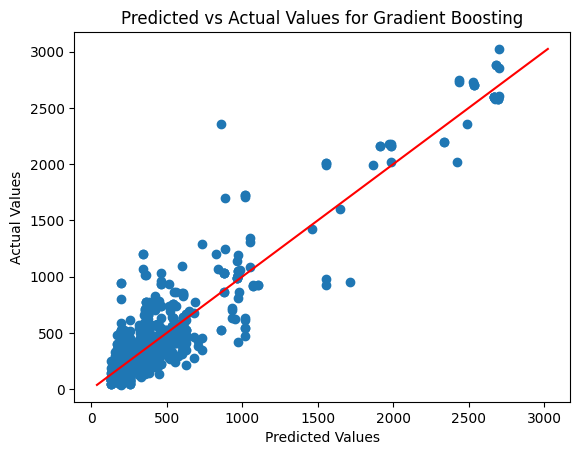

In [80]:
# Plotting actual vs predicted values
plt.scatter(y_pred_gb, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values for Gradient Boosting")
plt.show()

#### **Test Set Performance**

In [81]:
# Define a list of models
models = [
    ("Random Forest", RandomForestRegressor(n_estimators = 100, random_state = 42)),
    ("k-Nearest Neighbors (k-NN)", KNeighborsRegressor(n_neighbors = 5)),
    ("Decision Tree", DecisionTreeRegressor(max_depth = 3)),
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso(alpha = 0.1)),
    ("Ridge Regression", Ridge(alpha = 0.1)),
    ("Elastic Net", ElasticNet(alpha = 0.1, l1_ratio = 0.5)),
    ("XGBoost", XGBRegressor(objective = 'reg:squarederror')),
    ("Neural Networks", MLPRegressor(hidden_layer_sizes = (100, ), max_iter = 500)),
    ("Support Vector Regression (SVR)", SVR(kernel = 'linear')),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42))
]

In [82]:
# Create an empty list to store dictionaries of metrics
metrics_list_test = []

# Loop over models
for model_name, model in models:
    # Train the model and make predictions on the test set
    model.fit(X_train_top_ten, y_train)
    y_pred_test = model.predict(X_test_top_ten)

    # Calculate performance metrics on the test set
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared = False)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Append metrics to the list
    metrics_list_test.append({
        'Model': model_name,
        'MSE (Test)': mse_test,
        'RMSE (Test)': rmse_test,
        'MAE (Test)': mae_test,
        'R2 (Test)': r2_test
    })

# Create a dataframe from the list of metrics
metrics_df_test = pd.DataFrame(metrics_list_test)
metrics_df_test

C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MSE (Test),RMSE (Test),MAE (Test),R2 (Test)
0,Random Forest,20871.732775,144.470526,89.569516,0.869503
1,k-Nearest Neighbors (k-NN),27545.479481,165.968309,100.193173,0.827776
2,Decision Tree,50157.267482,223.958182,144.343208,0.686399
3,Linear Regression,71668.238676,267.709243,188.904089,0.551905
4,Lasso Regression,71544.874358,267.478736,188.552219,0.552677
5,Ridge Regression,71659.991726,267.693840,188.884705,0.551957
6,Elastic Net,74186.283348,272.371591,180.610917,0.536162
7,XGBoost,19676.507762,140.272976,88.219607,0.876976
8,Neural Networks,39457.070751,198.638040,127.875231,0.753301
9,Support Vector Regression (SVR),98273.945297,313.486755,149.617145,0.385557


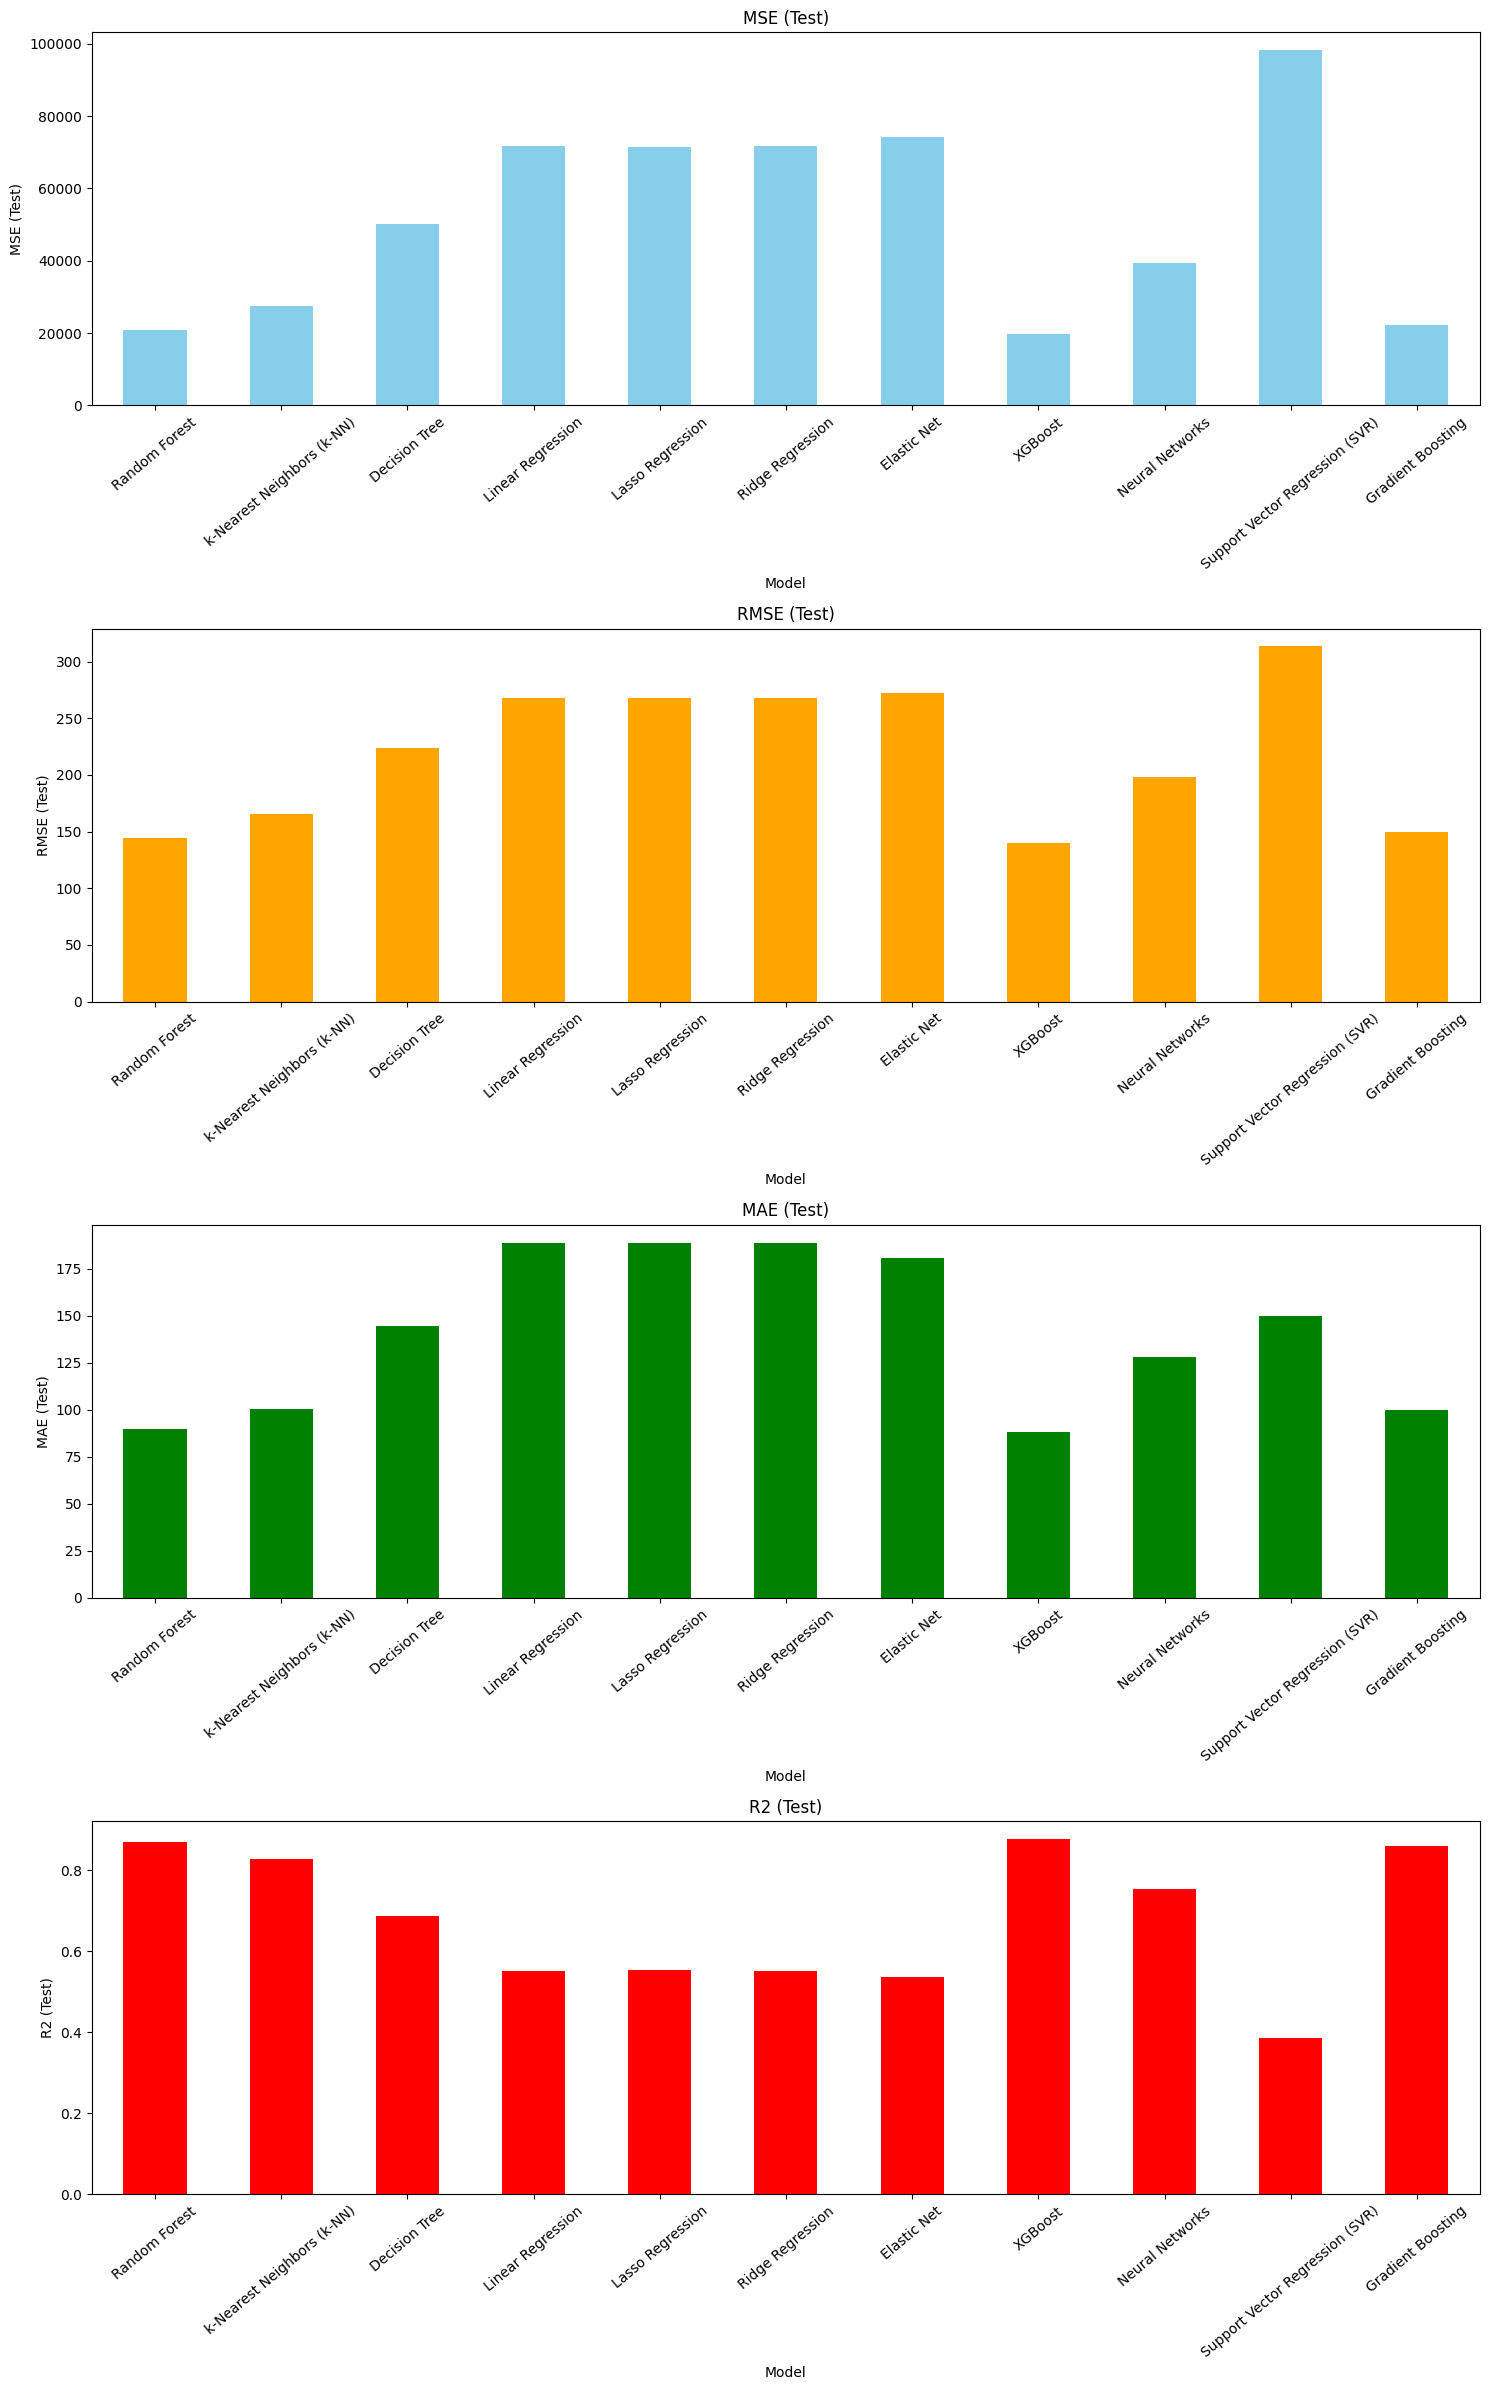

In [83]:
# Set the model names as the index
metrics_df_test.set_index('Model', inplace = True)

# Define the metrics
metrics_to_plot = ['MSE (Test)', 'RMSE (Test)', 'MAE (Test)', 'R2 (Test)']

# Create subplots for each metric
fig, axes = plt.subplots(nrows = len(metrics_to_plot_cv), ncols = 1, figsize = (15, 6 * len(metrics_to_plot_cv)))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics_to_plot):
    metrics_df_test[metric].plot(kind = 'bar', ax = axes[i], color = colors[i])
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis = 'x', rotation = 40)

plt.tight_layout()
plt.show()

#### **Feature Scaling on Test Set**

In [84]:
# Initialize a StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Create an empty list to store dictionaries of metrics for the scaled test set
metrics_list_test_scaled = []

# Loop over models
for model_name, model in models:
    # Train the model on the scaled training set
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test set
    y_pred_test_scaled = model.predict(X_test_scaled)

    # Calculate performance metrics on the scaled test set
    mse_test_scaled = mean_squared_error(y_test, y_pred_test_scaled)
    rmse_test_scaled = mean_squared_error(y_test, y_pred_test_scaled, squared = False)
    mae_test_scaled = mean_absolute_error(y_test, y_pred_test_scaled)
    r2_test_scaled = r2_score(y_test, y_pred_test_scaled)

    # Append metrics to the list
    metrics_list_test_scaled.append({
        'Model': model_name,
        'MSE (Test Scaled)': mse_test_scaled,
        'RMSE (Test Scaled)': rmse_test_scaled,
        'MAE (Test Scaled)': mae_test_scaled,
        'R2 (Test Scaled)': r2_test_scaled
    })

# Create a dataframe from the list of metrics for the scaled test set
metrics_df_test_scaled = pd.DataFrame(metrics_list_test_scaled)
metrics_df_test_scaled

C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.362e+05, tolerance: 1.432e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MSE (Test Scaled),RMSE (Test Scaled),MAE (Test Scaled),R2 (Test Scaled)
0,Random Forest,4499.455113,67.077978,28.875349,0.971868
1,k-Nearest Neighbors (k-NN),23316.124925,152.696185,74.021995,0.854219
2,Decision Tree,50157.267482,223.958182,144.343208,0.686399
3,Linear Regression,26385.575457,162.436374,101.674703,0.835028
4,Lasso Regression,26220.558603,161.927634,98.708944,0.836060
5,Ridge Regression,26129.335686,161.645710,98.726646,0.836630
6,Elastic Net,26969.265218,164.223218,99.019448,0.831379
7,XGBoost,3985.435955,63.130309,36.582039,0.975082
8,Neural Networks,42601.565840,206.401468,51.686854,0.733640
9,Support Vector Regression (SVR),32281.434587,179.670350,86.226335,0.798165


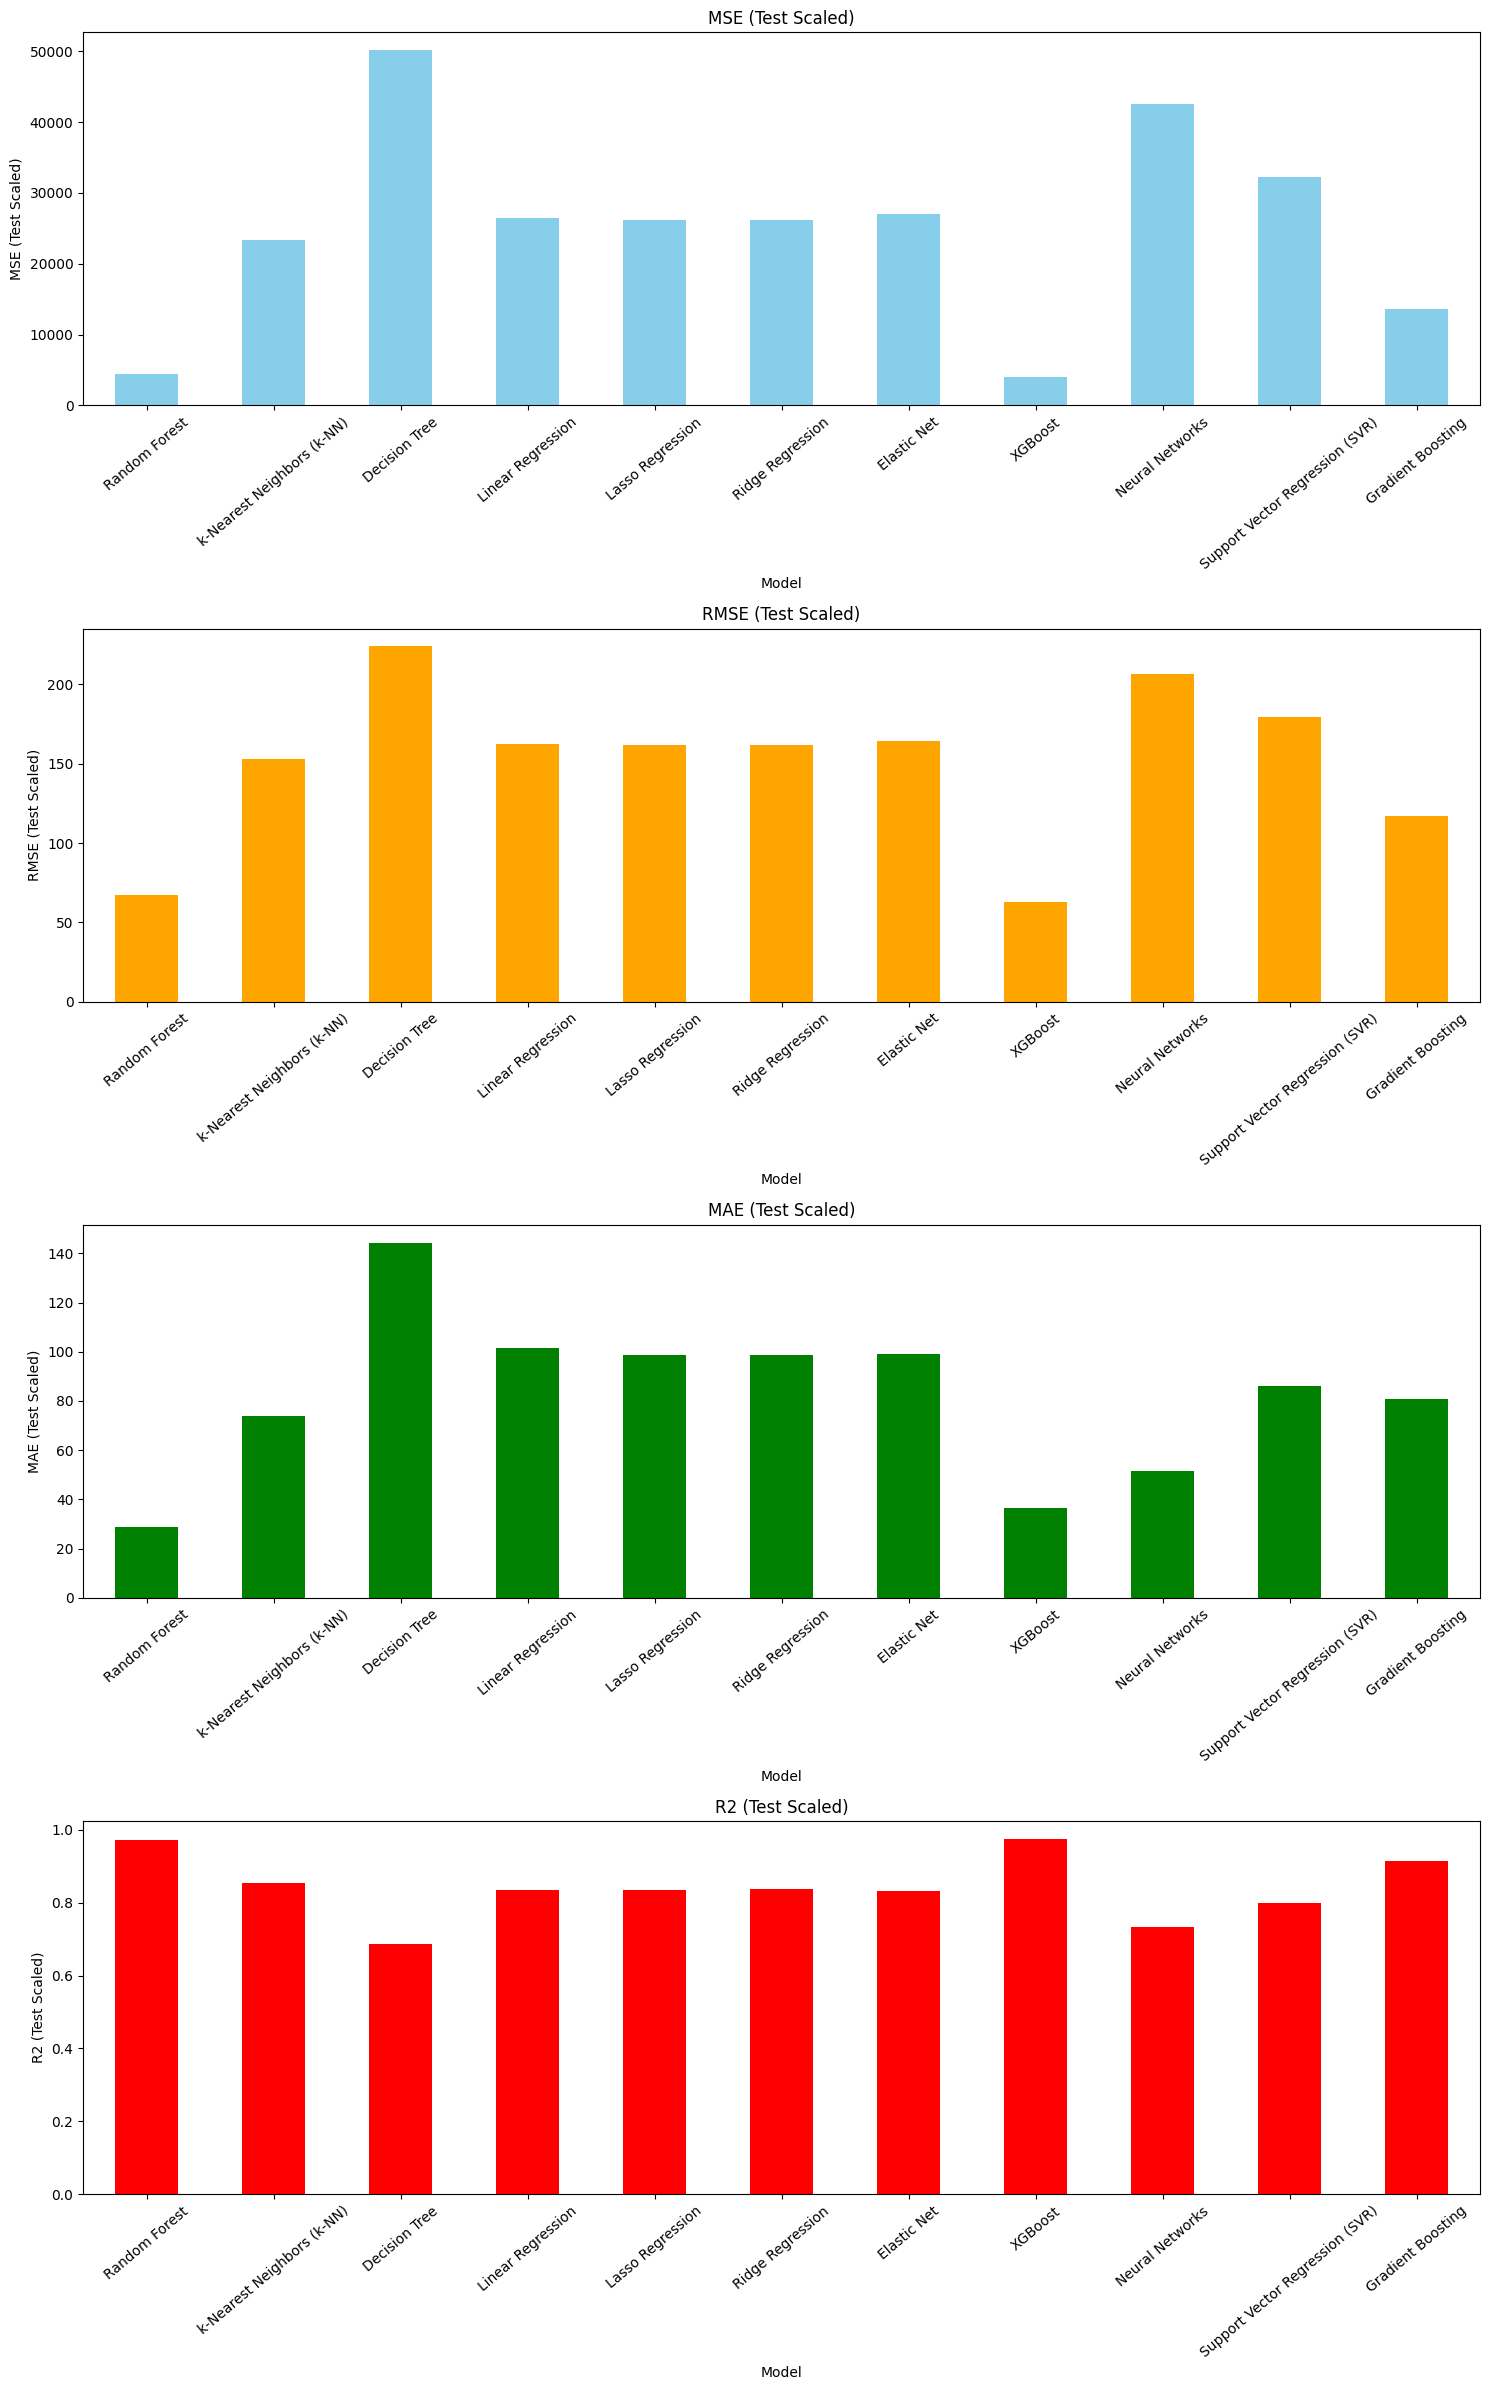

In [86]:
# Set the model names as the index
metrics_df_test_scaled.set_index('Model', inplace = True)

# Define the metrics
metrics_to_plot_test_scaled = ['MSE (Test Scaled)', 'RMSE (Test Scaled)', 'MAE (Test Scaled)', 'R2 (Test Scaled)']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics_to_plot_test_scaled), ncols = 1, figsize = (15, 6 * len(metrics_to_plot_test_scaled)))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics_to_plot_test_scaled):
    metrics_df_test_scaled[metric].plot(kind = 'bar', ax = axes[i], color = colors[i])
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis = 'x', rotation = 40)

plt.tight_layout()
plt.show()